In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import math
import flux_maps as maps
import flux_model as model
from windrose import WindroseAxes
from matplotlib import rc

/tmp/ipykernel_205472/349540908.py:18: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(y,x,conc_slice, cmap=cm.Purples,label='Concentration')


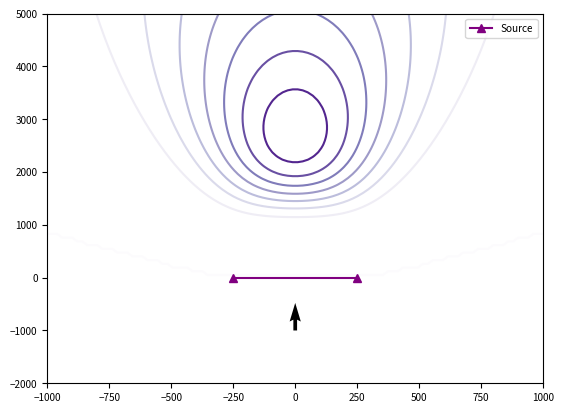

In [17]:
# Parameters
q = 1.0      # Emission rate in grams per second
u = 100.0       # Wind speed in meters per second
h = 200.0      # Effective stack height in meters
ls = 500.0    # Source width in meters
case = 2     # Atmospheric stability class (0-based index, from 0 to 5)
# Create the coordinate grids
x = np.linspace(-2000, 5000, 100)
y = np.linspace(-1000, 1000, 100)
z = np.linspace(-700, 700, 50)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

# Compute the concentration data
concentration = model.conc_line(q, u, X, Y, Z, h, ls, case)

slice_index = 25
conc_slice = concentration[:,:,slice_index]
plt.contour(y,x,conc_slice, cmap=cm.Purples,label='Concentration')

line = [[-ls/2,ls/2],[0,0]]
plt.plot(line[0],line[1],marker='^',color='purple',label='Source')

plt.quiver(0,-1000,0,500)
plt.legend()



np.float64(-14.28571428571422)

In [9]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerPatch
plt.style.use("default")
rc('font',**{'family':'Source Sans 3','weight':'normal','size':'8'})

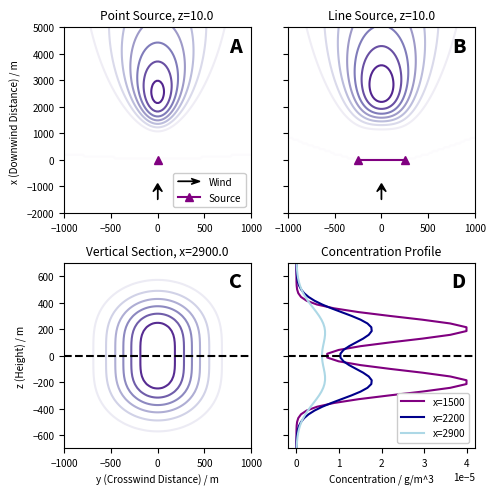

In [41]:
fig, axs = plt.subplots(2, 2, figsize=(5, 5),sharey='row')

def label_subplots(axs, labels=['A', 'B', 'C', 'D'], xpos=0.95, ypos=0.95):
    for ax, label in zip(axs, labels):
        ax.text(xpos, ypos, label, transform=ax.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
label_subplots(axs.flatten())

concentration = model.conc_point(q, u, X, Y, Z, h, case)
slice_index = 25
conc_slice = concentration[:,:,slice_index]

axs[0,1].sharey(axs[0,0])
axs[0,0].contour(y,x,conc_slice, cmap=cm.Purples)


axs[0,0].plot(0,0,color='purple',label='Source',marker='^')

axs[0,0].arrow(0,-1500,0,300,head_length=300,head_width=100,overhang=0.5,fc='black')


concentration = model.conc_line(q, u, X, Y, Z, h, ls, case)
conc_slice = concentration[:,:,slice_index]
axs[0,1].contour(y,x,conc_slice, cmap=cm.Purples)
line = [[-ls/2,ls/2],[0,0]]

axs[0,1].plot(line[0],line[1],marker='^',color='purple',label='Source')
source=mlines.Line2D([], [], color='purple', marker='^',label='Source')
arrow = axs[0,1].arrow(0,-1500,0,300,head_length=300,head_width=100,overhang=0.5,fc='black',label='Wind')
def make_legend_arrow(legend, orig_handle,
                      xdescent, ydescent,
                      width, height, fontsize):
    p = mpatches.FancyArrow(0, 0.5*height, width, 0, length_includes_head=True, head_width=0.75*height,overhang=0.5)
    return p
leg = axs[0,0].legend(handles=[arrow,source], labels=['Wind','Source'], handler_map={mpatches.FancyArrow : HandlerPatch(patch_func=make_legend_arrow),
                    }, loc='lower right',bbox_to_anchor=(1,0),frameon=True,framealpha=1)
x_slice_index = 80
conc_slice = concentration[x_slice_index,:,:]
conc_slice = conc_slice.T
axs[1,0].contour(y,z,conc_slice, cmap=cm.Purples)
axs[1,0].axhline(0,color='black',linestyle='--')
x_slice_index = 50
for x_slice_index,col in zip([50,60,70],['purple','darkblue','lightblue']):
    conc_slice = concentration[x_slice_index,x_slice_index,:]
    axs[1,1].plot(conc_slice,z,label=f'x={np.round(x[x_slice_index],-2):.0f}',color=col)
axs[1,1].legend(framealpha=1,loc='lower right')

axs[1,1].axhline(0,color='black',linestyle='--')
axs[0,0].set_title(f'Point Source, z={ np.round(z[slice_index],-1)} ')
axs[0,1].set_title(f'Line Source, z={ np.round(z[slice_index],-1) }')
axs[1,0].set_title(f'Vertical Section, x={np.round(x[x_slice_index],-2)}')
axs[1,1].set_title('Concentration Profile')

axs[0,0].set_ylabel('x (Downwind Distance) / m ')
axs[1,0].set_ylabel('z (Height) / m')
axs[1,0].set_xlabel('y (Crosswind Distance) / m')
axs[1,1].set_xlabel('Concentration / g/m^3')
plt.tight_layout()

plt.savefig('overview.png',dpi=300)

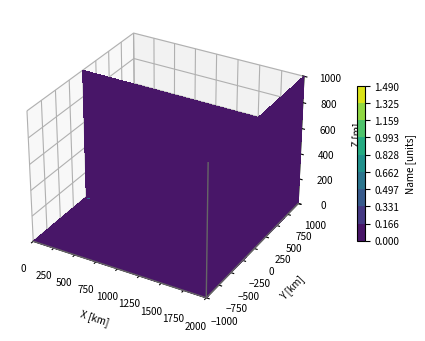

In [11]:
# Define the grid
x = np.linspace(0, 2000, 100)
y = np.linspace(-1000, 1000, 200)
z = np.linspace(0, 1000, 200)
X, Y, Z = np.meshgrid(x, y, z)

# Simulate the plume
plume = model.conc_point(100, 1, X, Y, Z, 0.5, 0)
data = plume

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 10),
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
_ = ax.contourf(
    X[:, :, 0], Y[:, :, 0], data[:, :, 0],
    zdir='z', offset=0, **kw
)
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, **kw
)
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='X [km]',
    ylabel='Y [km]',
    zlabel='Z [m]',
)



# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Name [units]')

# Show Figure
plt.ion()

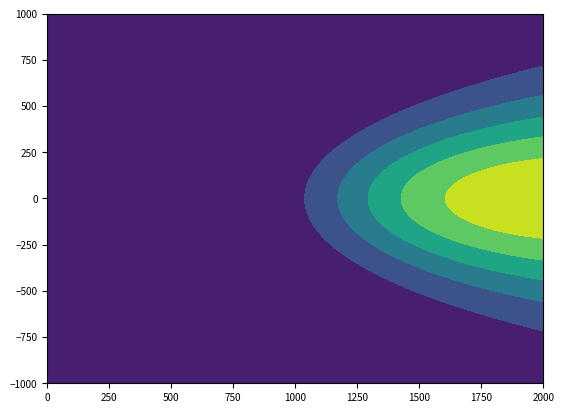

TypeError: Shapes of x (200, 2) and z (100, 200) do not match

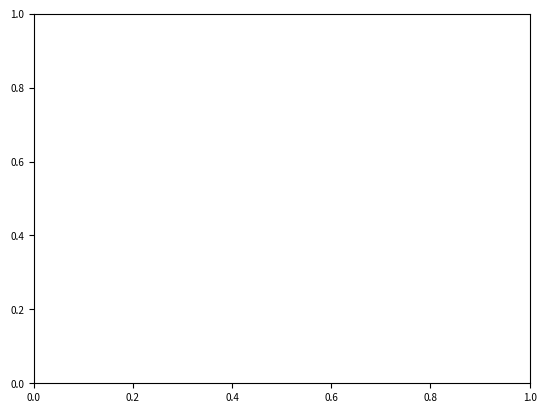

In [12]:

import matplotlib.pyplot as plt

from matplotlib import cm

plume_at_height = plume[:,:,100]
plt.contourf(X[:,:,0], Y[:,:,0], plume_at_height, cmap=cm.viridis)
plt.show()

plume_at_x = plume[50,:,:]
plt.contourf(list(enumerate(plume_at_x[0])),list(enumerate(plume_at_x[1])), plume_at_x, cmap=cm.viridis)
plt.show()


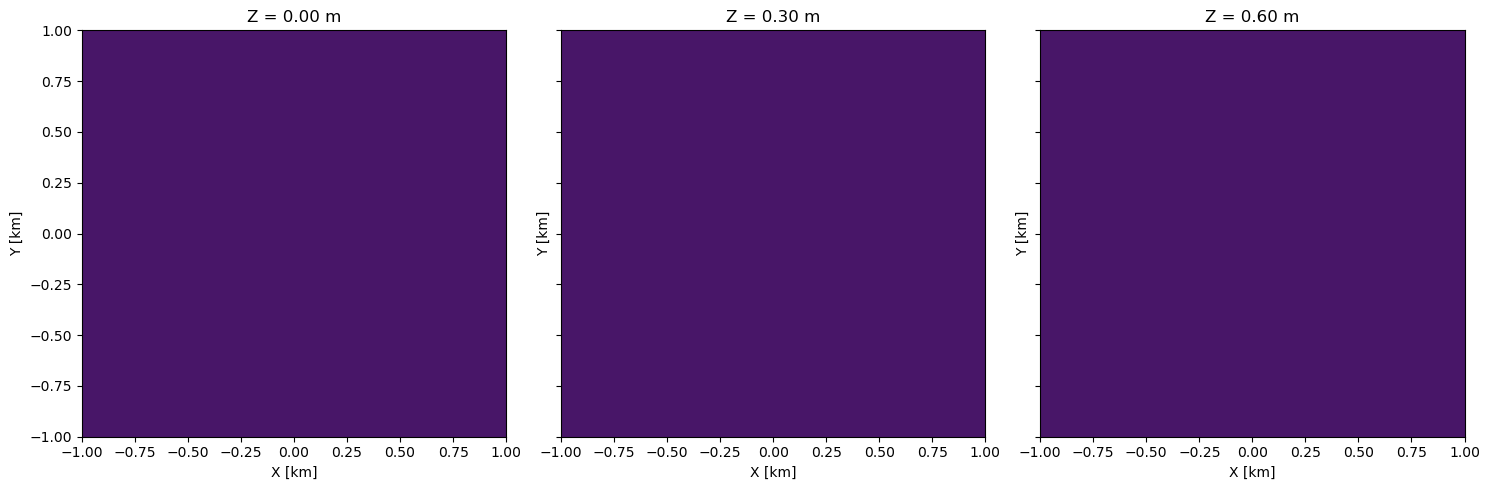

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
for i, ax in enumerate(axs):
    ax.contourf(X[:, :, i], Y[:, :, i], data[:, :, i], **kw)
    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax])
    ax.set(xlabel='X [km]', ylabel='Y [km]')
    ax.set_title(f'Z = {z[i*60]:.2f} m')

plt.tight_layout()
plt.show()

